# 01 - Data Exploration

**Goal:** Load and understand the CIFAR-10 dataset

## Overview
In this notebook, we will:
1. Load the CIFAR-10 dataset
2. Explore the data structure and some statistics
3. Visualize class distribution
4. Examine sample images

### Setup and Imports

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('../')
from src.data.cifar10 import load_cifar10, visualize_samples, get_class_distribution

### Load CIFAR-10 Dataset

We'll load the full CIFAR-10 dataset with:
- 50,000 training images (split into 45,000 training and 5,000 validation)
- 10,000 testing images
- 10 classes (balanced, hopefully)

The `load_cifar10()` function:
- Normalizes pixel values from 0 to 1
- Maintains equal balance in the train/validation split
- Flattens labels from (N, 1) to (N,)

In [2]:
# Load the full dataset where 10% of training data goes to validation:

(training_images, training_labels), (validation_images, validation_labels), (testing_images, testing_labels), class_names = load_cifar10()

print("\nDataset loading completed")


Final splits:
Training:   45000 samples
Validation: 5000 samples
Testing:    10000 samples

Dataset loading completed


### Data Structure Overview

Let's examine the shape and overall structure of our dataset:

In [3]:
# Shapes
print("\nDataset Shapes:")
print(f"Training:   {training_images.shape} | Labels: {training_labels.shape}")
print(f"Validation: {validation_images.shape} | Labels: {validation_labels.shape}")
print(f"Testing:    {testing_images.shape} | Labels: {testing_labels.shape}")

# Ranges
print("\nValue Ranges:")
print(f"Image pixels: [{training_images.min():.3f}, {training_images.max():.3f}]")
print(f"Label range:  [{training_labels.min()}, {training_labels.max()}]")

# Classes
print("\nClasses:")
for i, name in enumerate(class_names):
    print(f"{i}: {name}")


Dataset Shapes:
Training:   (45000, 32, 32, 3) | Labels: (45000,)
Validation: (5000, 32, 32, 3) | Labels: (5000,)
Testing:    (10000, 32, 32, 3) | Labels: (10000,)

Value Ranges:
Image pixels: [0.000, 1.000]
Label range:  [0, 9]

Classes:
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck


### Class Distribution

Let's verify that:
1. Classes are balanced, each having ~10% of samples
2. Stratified split preserved class proportions across train/val/test sets

In [4]:
print("Training Set:")
get_class_distribution(training_labels, class_names)

print("\nValidation Set:")
get_class_distribution(validation_labels, class_names)

print("\nTesting Set:")
get_class_distribution(testing_labels, class_names)

Training Set:

Class Distribution:
airplane: 4500 samples (10.00%)
automobile: 4500 samples (10.00%)
bird: 4500 samples (10.00%)
cat: 4500 samples (10.00%)
deer: 4500 samples (10.00%)
dog: 4500 samples (10.00%)
frog: 4500 samples (10.00%)
horse: 4500 samples (10.00%)
ship: 4500 samples (10.00%)
truck: 4500 samples (10.00%)

Validation Set:

Class Distribution:
airplane: 500 samples (10.00%)
automobile: 500 samples (10.00%)
bird: 500 samples (10.00%)
cat: 500 samples (10.00%)
deer: 500 samples (10.00%)
dog: 500 samples (10.00%)
frog: 500 samples (10.00%)
horse: 500 samples (10.00%)
ship: 500 samples (10.00%)
truck: 500 samples (10.00%)

Testing Set:

Class Distribution:
airplane: 1000 samples (10.00%)
automobile: 1000 samples (10.00%)
bird: 1000 samples (10.00%)
cat: 1000 samples (10.00%)
deer: 1000 samples (10.00%)
dog: 1000 samples (10.00%)
frog: 1000 samples (10.00%)
horse: 1000 samples (10.00%)
ship: 1000 samples (10.00%)
truck: 1000 samples (10.00%)


### Class Distribution Visualized

Let's make a bar graph to see the number of samples per class in the training set:

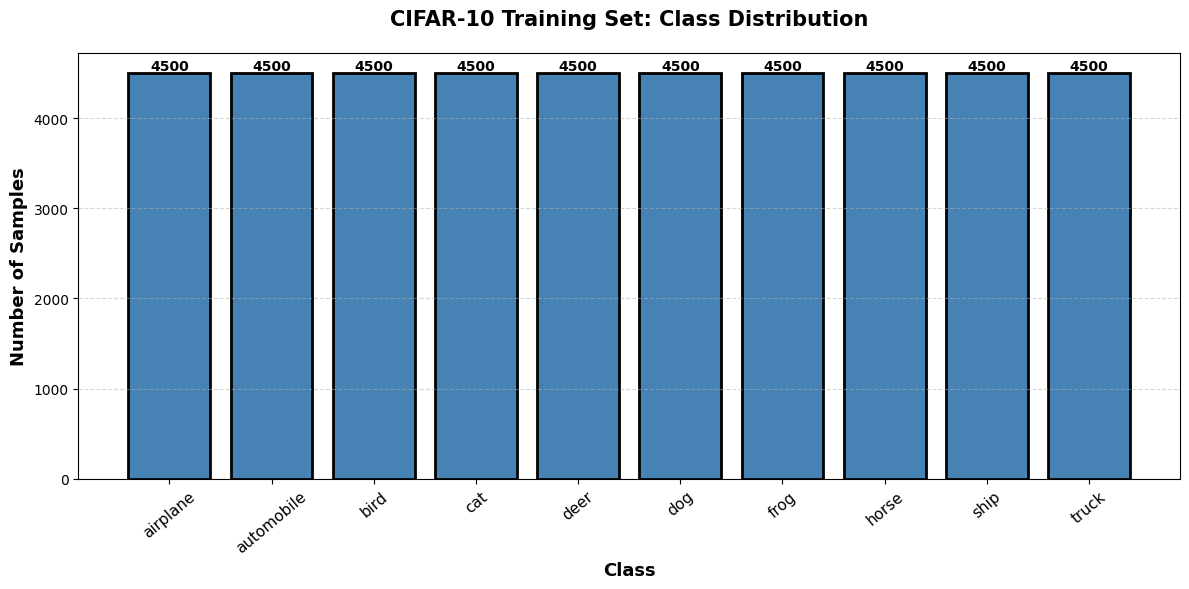

Saved in results/figures/01_class_distribution.png


In [5]:
# Samples per class
class_counts = []
for i in range(10):
    class_counts.append(np.sum(training_labels == i))

# Bar graph
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(class_names, class_counts, color='steelblue', edgecolor='black', linewidth=2)
# hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
# for bar, hatch in zip(bars, hatches):
#     bar.set_hatch(hatch)
ax.set_xlabel('Class', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Samples', fontsize=13, fontweight='bold')
ax.set_title('CIFAR-10 Training Set: Class Distribution', fontsize=15, fontweight='bold', pad=20)
ax.tick_params(axis='x', rotation=40, labelsize=11)
ax.grid(axis='y', alpha=0.5, linestyle='--')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/01_class_distribution.png', bbox_inches='tight')
plt.show()

print("Saved in results/figures/01_class_distribution.png")

### Random Sample Visualization

Let's display 16 random images from the training set to get a feel for the data quality and variety:

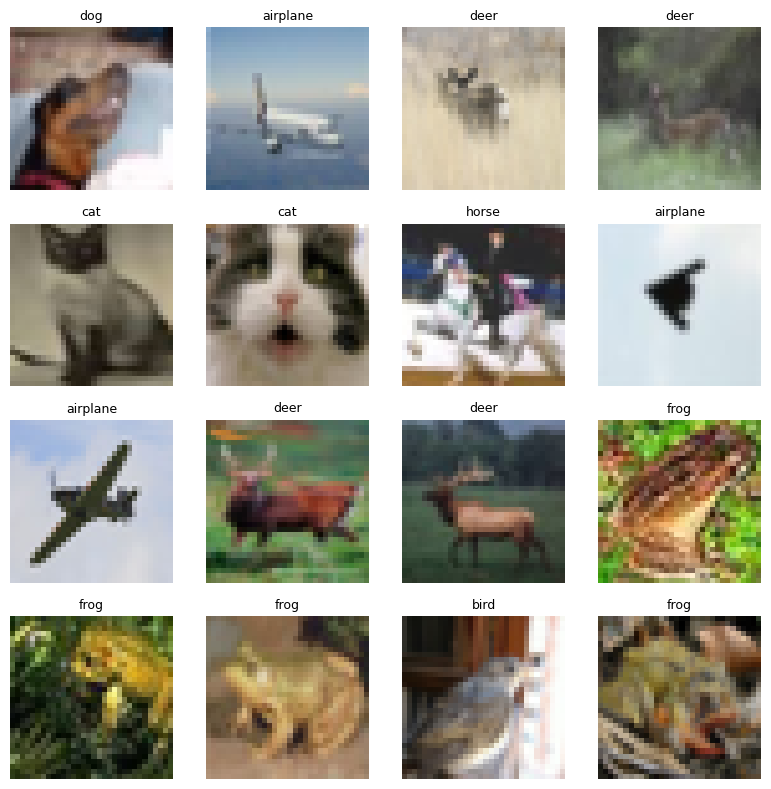

In [6]:
visualize_samples(training_images, training_labels, class_names, 16)

### One Sample Per Class

Let's see one image from each of the 10 classes:

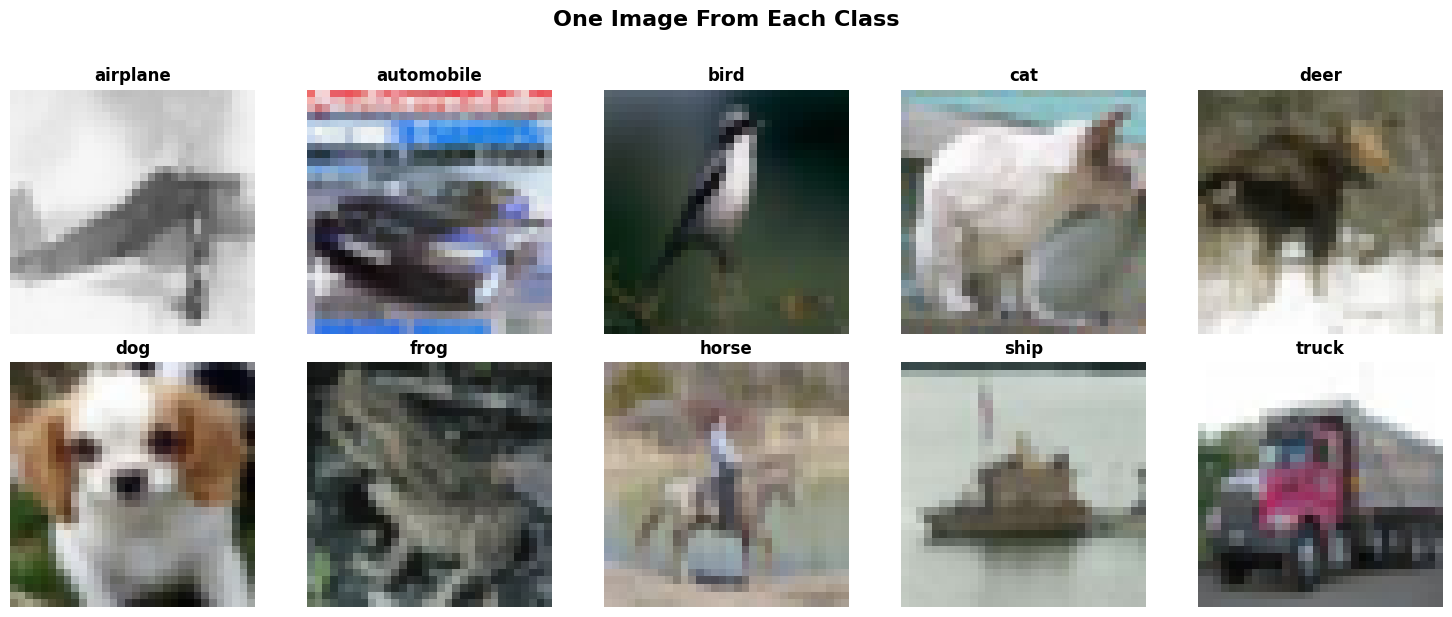

Saved in results/figures/01_one_per_class.png


In [7]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, class_name in enumerate(class_names):
    idx = np.where(training_labels == i)[0][0]   # First image
    axes[i].imshow(training_images[idx])
    axes[i].set_title(f"{class_name}", fontsize=12, fontweight='bold')
    axes[i].axis('off')

plt.suptitle('One Image From Each Class', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../results/figures/01_one_per_class.png', bbox_inches='tight')
plt.show()

print("Saved in results/figures/01_one_per_class.png")

### Pixel Statistics

Let's analyze the distribution of pixel values across the entire training set:

In [8]:
print("Overall Statistics:")
print(f"Mean:     {training_images.mean():.4f}")
print(f"Std Dev:  {training_images.std():.4f}")
print(f"Median:   {np.median(training_images):.4f}")
print(f"Min:      {training_images.min():.4f}")
print(f"Max:      {training_images.max():.4f}")

print("\nColor Channel Statistics:")
channels = ['Red', 'Green', 'Blue']
for i, channel in enumerate(channels):
    channel_data = training_images[:, :, :, i]
    print(f"{channel} channel - Mean: {channel_data.mean():.4f}, Std: {channel_data.std():.4f}")

Overall Statistics:
Mean:     0.4736
Std Dev:  0.2517
Median:   0.4588
Min:      0.0000
Max:      1.0000

Color Channel Statistics:
Red channel - Mean: 0.4915, Std: 0.2471
Green channel - Mean: 0.4824, Std: 0.2436
Blue channel - Mean: 0.4468, Std: 0.2618


### Brightness Value Distribution by Channel

Let's make a history to see how pixel values are distributed across the 3 channels. This would help us understand color balance and intensity distribution:

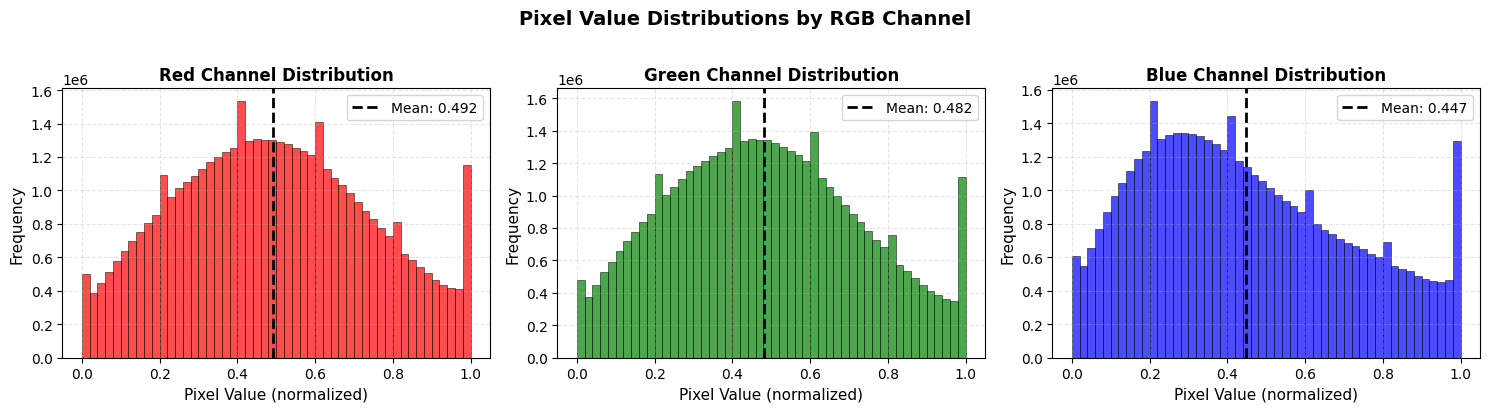

Saved in results/figures/01_pixel_distributions.png


In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

channels = ['Red', 'Green', 'Blue']
colors = ['red', 'green', 'blue']

for i, (channel, color) in enumerate(zip(channels, colors)):
    channel_data = training_images[:, :, :, i].flatten()
    
    axes[i].hist(channel_data, bins=50, color=color, alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[i].set_xlabel('Pixel Value (normalized)', fontsize=11)
    axes[i].set_ylabel('Frequency', fontsize=11)
    axes[i].set_title(f'{channel} Channel Distribution', fontsize=12, fontweight='bold')
    axes[i].grid(alpha=0.3, linestyle='--')
    mean_val = channel_data.mean()
    axes[i].axvline(mean_val, color='black', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.3f}')
    axes[i].legend()

plt.suptitle('Pixel Value Distributions by RGB Channel', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../results/figures/01_pixel_distributions.png', bbox_inches='tight')
plt.show()

print("Saved in results/figures/01_pixel_distributions.png")

From the pixel value distribution, we can conclude that:

1. Pixel values are mostly balanced across the full range from 0 to 1. This means the images have good contrast and are not overly dark or washed out.

2. All three channels are roughly bell-shaped distribution

3. The Red and Green channels have higher averages (≈ 0.49)

4. Due to small imbalances, our model may benefit from data augmentation and careful tuning of preprocessing

### Summary

Data exploration is complete! Here's a quick summary of what we learned about CIFAR-10:

In [10]:
print(f"Dataset size: {len(training_images):,} for training set, {len(validation_images):,} for validation set, {len(testing_images):,} testing set")
print(f"Image dimensions: {training_images.shape[1]}x{training_images.shape[2]} pixels, with 3 color channels (RGB)")
print(f"Classes: 10 (balanced distribution, ~10% each)")
print(f"Pixel values: Normalized to in between 0 and 1")
print(f"Stratified split: Class proportions preserved across train/val/test")

print("\nGenerated Visualizations:")
print("01_class_distribution.png")
print("01_one_per_class.png")
print("01_pixel_distributions.png")

print("\nNext Steps:\nFeature Extraction")
print("Load pretrained ResNet50 model")
print("Extract features from CIFAR-10 images")
print("Apply PCA for dimensionality reduction")
print("Prepare features for TDA analysis")

Dataset size: 45,000 for training set, 5,000 for validation set, 10,000 testing set
Image dimensions: 32x32 pixels, with 3 color channels (RGB)
Classes: 10 (balanced distribution, ~10% each)
Pixel values: Normalized to in between 0 and 1
Stratified split: Class proportions preserved across train/val/test

Generated Visualizations:
01_class_distribution.png
01_one_per_class.png
01_pixel_distributions.png

Next Steps:
Feature Extraction
Load pretrained ResNet50 model
Extract features from CIFAR-10 images
Apply PCA for dimensionality reduction
Prepare features for TDA analysis
